In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print (tf.__version__)
print (sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print (module.__name__, module.__version__)

2.0.0-beta1
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-beta1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print (housing.DESCR)
print (housing.data.shape)
print (housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7, test_size=0.25)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11, test_size = 0.25)

print (x_train.shape, y_train.shape)
print (x_valid.shape, y_valid.shape)
print (x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #这里使用fit_transform函数，因为在训练集上获得均值和方差，在验证集和测试集上面使用
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
def custoized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))


model = keras.models.Sequential([
    keras.layers.Dense(30, activation ='relu',
                      input_shape =x_train.shape[1:]),
    keras.layers.Dense(1),
])
model.summary()
model.compile(loss=custoized_mse, optimizer='sgd',
             metrics =["mean_squared_error"])
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train_scaled,y_train,
                   validation_data=(x_valid_scaled,y_valid),
                   epochs=100,
                   callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3329 - mean_squared_error: 0.3329 - val_loss: 0.3499 - val_mean_squared_error: 0.3499
Epoch 2/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3318 - mean_squared_error: 0.3318 - val_loss: 0.3464 - val_mean_squared_error: 0.3464
Epoch 3/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3300 - mean_squared_error: 0.3300 - val_loss: 0.4098 - val_mean_squared_error: 0.4098
Epoch 4/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3317 - mean_squared_error: 0.3317 - val_loss: 0.3578 - val_mean_squared_error: 0.3578
Epoch 5/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3288 - mean_squared_error: 0.3288 - val_loss: 0.3568 - val_mean_squared_error: 0.3568
Epoch 6/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3267 - mean_squar

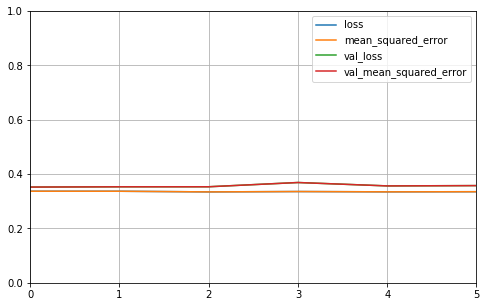

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)

    plt.show()
    
plot_learning_curves(history)